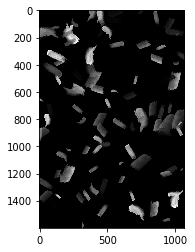

51247-INFO-Stage 9 ended
51247-INFO-Greedy search ended
51247-INFO-Elapsed time: 44.38s


In [1]:
from genetic_drawing import *
from drawer import *
import time
from stopwatch import *
log.setLevel(level=logging.INFO)
sw = StopWatch()
problem = DrawingProblem(image_path = 'sam/sam2.jpg')
random.seed(time.time())
ga = GreedyGeneticDrawing(problem)
sw.start()
monitor = ga.generate(stages=10, n_generations=20, population_size=1, individual_size=10)
sw.stop()
log.info(f'Elapsed time: {sw}')

In [2]:
#load a custom mask and set a smaller brush size for finer details
sampling_mask = cv2.cvtColor(cv2.imread("sam/mask_sam2.jpg"), cv2.COLOR_BGR2GRAY)
finer_problem = DrawingProblem(color_image = problem.color_image, sampling_mask = sampling_mask)
brushes_range = DrawingBrushesRange([[0.05, 0.1], [0.1, 0.2]])
ga = GreedyGeneticDrawing(finer_problem, brushes_range, monitor.drawer)
sw.start()
out = ga.generate(stages=40, n_generations=30, population_size=1, individual_size=10)
sw.stop()
log.info(f'Elapsed time: {sw}')

NameError: name 'monitor' is not defined

In [ ]:
#save all the images from the image buffer
import cv2
import os
if not os.path.exists('out'):
    os.mkdir("out")
for i in range(len(gen.imgBuffer)):
    cv2.imwrite(os.path.join("out", f"{i:06d}.png"), gen.imgBuffer[i])
#if you want to save only last image, run below
# cv2.imwrite("out/final.png', out)